In [22]:
import os
import cv2
import torch
from PIL import Image, ImageOps, ImageDraw
from facenet_pytorch import MTCNN

repo_dir = "c:/Users/James/git/de-identification"

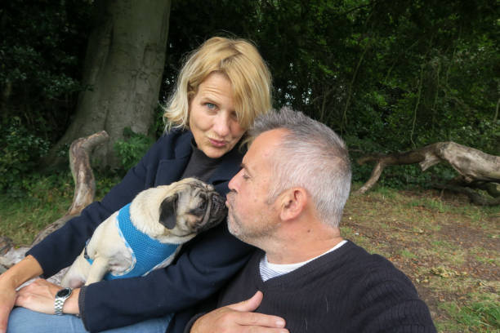

In [23]:
image_path = os.path.join(repo_dir, "dev-notebooks/media/facial-img-2.jpg")
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(ImageOps.contain(Image.fromarray(img), (500, 500)))

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device) #loading face detection model

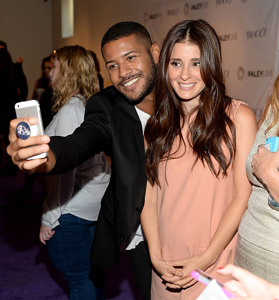

width: 96, height: 119, prob: 1.00
width: 81, height: 117, prob: 1.00
width: 22, height: 31, prob: 0.73
[2/3] faces used


In [45]:
image_path = os.path.join(repo_dir, "dev-notebooks/media/facial-img-1.jpg")
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(ImageOps.contain(Image.fromarray(img), (300, 300)))

all_boxes, all_probs, all_landmarks = mtcnn.detect(img.copy(), landmarks=True)
all_boxes = [[int(x) for x in box] for box in all_boxes] 
all_landmarks = [[[int(x), int(y)] for x, y in point] for point in all_landmarks] 

boxes, probs, landmarks = [], [], []
threshold = 0.9
for box, prob, landmark in zip(all_boxes, all_probs, all_landmarks):
        width = box[2] - box[0]
        height = box[3] - box[1]   #minimum requirement??
        print(f"width: {width}, height: {height}, prob: {prob:.2f}")
        if prob >= threshold: # and height > 30 and width > 30:
            boxes.append(box)
            probs.append(prob)
            landmarks.append(landmark)
print(f"[{len(boxes)}/{len(all_boxes)}] faces used")

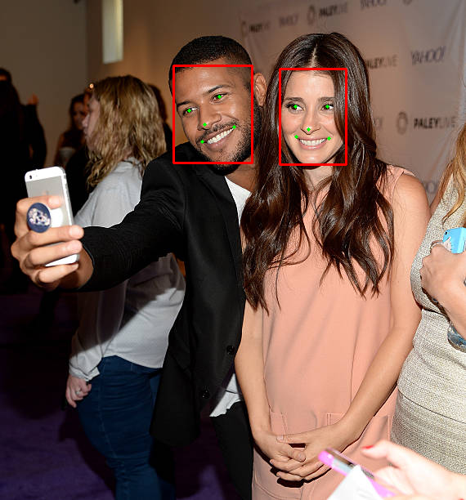

In [46]:
box = boxes[0]
for box, landmark in zip(boxes, landmarks):
    cv2.rectangle(img, box[:2], box[2:], (255, 0, 0), 2)
    for point in landmark:
        cv2.circle(img, point, 2, (0, 255, 0), -1)
display(ImageOps.contain(Image.fromarray(img), (500, 500)))

In [ ]:
#full end-to-end pipeline:
#1. Take input images and detect faces.
#2. align the faces to be vertical/flattened
#3. resize to 1024x1024
#4. create mask (using border width parameter)
#5. inpaint the image using styleGAN2-ADA
#6. take the inpainted, resize, unalign
#7. paste into original image using poisson blending